# Working with shapes

Note that the material here is not specifically connected to maps. The shapes could be on any plane. However, the tasks like those presented here are often used in GIS work, so 

In [1]:
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

### 0D shapes: Points

In [2]:
point = shapely.geometry.Point(0.2, 1.0)

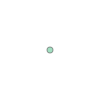

In [3]:
# Notice, the ipython '__repr__' (representation) displays the point as the output
point

In [7]:
# See some of the point attributes
print(point.geom_type)
print(point.area)
print(point.length)
print(point.bounds)
print(point.coords)   # explore this object...
print(point.coords[:])

Point
0.0
0.0
(0.2, 1.0, 0.2, 1.0)
[(0.2, 1.0)]


In [8]:
#distance between two points
point1.distance(point2)

0.806225774829855

In [5]:
# A collection of random points...
point1 = shapely.geometry.Point(0.2, 1.0)
point2 = shapely.geometry.Point(0.1, 0.2)
point3 = shapely.geometry.Point(0.5, 0.0)
point4 = shapely.geometry.Point(0.8, 0.5)

In [6]:
# We can see the distance of the points from one another
point1.distance(point2)

0.806225774829855

### 1D shapes: Lines and Rings

In [13]:
# An ordered sequence of points is a `LineString'
line = shapely.geometry.LineString((point1, point2, point3, point4))
line
line.distance(shapely.geometry.Point(0.5,0.5))

0.2572478777137633

In [10]:
# To make a closed shape, use a `LinearRing'

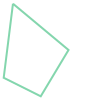

In [14]:
closed_line = shapely.geometry.LinearRing(line)
closed_line

In [12]:
# Some of the attributes of the LinearRing..
print(closed_line.area)   # no area since it is not 'filled'
print(closed_line.length) # the perimeter of the shape
print(closed_line.bounds) # an xy-plane bounding box

0.0
2.6175595274050085
(0.1, 0.0, 0.8, 1.0)


### 2D shapes, Polygons and Buffers

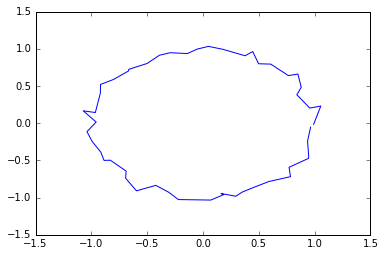

In [15]:
# Let's make a circule, with some noise

N = 50

x = np.cos(np.linspace(0, 2.0*np.pi, N+1))[:-1] + 0.05*np.random.randn(50)
y = np.sin(np.linspace(0, 2.0*np.pi, N+1))[:-1] + 0.05*np.random.randn(50)

plt.plot(x, y, '-')


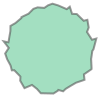

In [16]:
xy = zip(x, y) #polygon wants x,y pairs - created them using zip
poly = shapely.geometry.Polygon(xy)
poly

In [22]:
xy = zip(x,y)
x, y = zip(*xy)

3.124019117975975
POINT (0.0004521170631104172 -0.008140194383518104)
False True


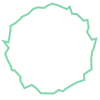

In [23]:
# Some of the Polygon attributes
print(poly.area)
print(poly.centroid)
print(poly.contains(point1), poly.contains(point2))
poly.boundary

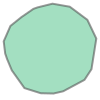

In [24]:
poly.convex_hull

We can also create 2D objects by adding buffers to existing 0D and 1D objects

0.43707170794277556

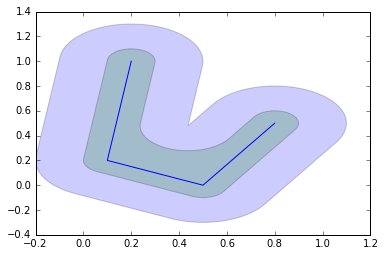

In [26]:
dialated = line.buffer(0.3)
eroded = dialated.buffer(-0.2)

plt.plot(*line.xy)
plt.fill(*dialated.boundary.xy, alpha=0.2)
plt.fill(*eroded.boundary.xy, alpha=0.2)
eroded.area

### Operations

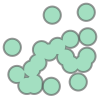

In [27]:
# First, let's make a collection of fat points.
xy = np.random.rand(20, 2)
points = shapely.geometry.MultiPoint(xy).buffer(0.1)
points

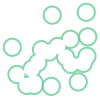

In [28]:
regions = shapely.ops.linemerge(points.boundary)
regions

In [34]:
line = shapely.geometry.LineString([(0, 0), (1, 1)])
intersections = [poly.intersects(line) for poly in regions]
intersections

[True, False, False, False, False, False, True, False]

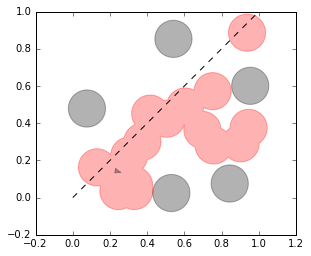

In [35]:
for poly in regions:
    if poly.intersects(line):
        color = 'r'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)


x, y = zip(*line.coords[:])
plt.plot(x, y, '--k')
plt.gca().set_aspect(1.0)

In [36]:
line.coords[:]

[(0.0, 0.0), (1.0, 1.0)]

In [37]:
print(line.wkt)
# print(regions.wkt)   # big barf of text...

LINESTRING (0 0, 1 1)


In [40]:
print(regions.wkt)

MULTILINESTRING ((0.149938041276023 0.0646982129285385, 0.1495874050631555 0.06461038312944434, 0.1398800868944988 0.06317043850254768, 0.1300783728615427 0.06268891116976735, 0.1202766588285867 0.06317043850254765, 0.1105693406599299 0.06461038312944428, 0.1010499051360965 0.0669948775965464, 0.09181002962503376 0.07030095791863861, 0.08293869917894298 0.07449678473493175, 0.07452134955958251 0.0795419499395127, 0.06663904444517817 0.08538786583349353, 0.05936769474288794 0.09197823305111247, 0.05277732752526898 0.09924958275340268, 0.04693141163128811 0.107131887867807, 0.04188624642670713 0.1155492374871674, 0.03769041961041393 0.1244205679332582, 0.0343843392883217 0.133660443444321, 0.03199984482121954 0.1431798789681544, 0.03055990019432286 0.1528871971368112, 0.03007837286154255 0.1626889111697672, 0.03055990019432286 0.1724906252027233, 0.03199984482121948 0.1821979433713801, 0.03438433928832164 0.1917173788952135, 0.03769041961041386 0.2009572544062763, 0.04188624642670702 0.2

In [2]:
from mpl_toolkits.basemap import Basemap

In [ ]:
m = Basemap(11crnrlon=-150.,llcrnrlat=20.,
           urcrnrlon=-50.,urcrnrlat=50.,
           rsphere=(6378137.00,6356752.3142),
           resolution='1',projection='merc',
           lat_0=40.,lon_0=-100.,lat_ts=2-.)
m.readshapefile('states_21basic/')

In [ ]:
m.states